In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
paths = []

In [2]:
from typing_extensions import Final
def A_Search(startP, endP, world):
    '''
    Function tht takes start and end points with world grid as 2D array
    Assuming startP = [1,1] / endP = [4,1] and world as following
    [0   0   0   0   0]
    [0   0   0   0   0]
    [1   1   1   0   0]
    [0   0   0   0   0]
    [0   0   0   0   0]
    with 0 as free cells and 1 is occupied.
    and Modify that matrix to add map boundaries
    '''
    #Initiallizing NewWorld Matrix
    new_row = len(world)+2
    new_col = len(world[0])+2
    World = np.zeros((new_row,new_col))
    #Initializing Paths 2D array
    for i in range(new_row):
        for j in range(new_col):
            if (i==0)or(j==0)or(i==new_row-1)or(j==new_col-1):
                World[i][j] = 1
            else:
                World[i][j] = world[i-1][j-1]
    ReachedGoal = False
    #By Default initializing start and end
    start = [1,1]
    end = [5,5]
    #Rewrite start and end by input values
    start[0] = (startP[0])+1
    start[1] = (startP[1])+1
    end[0] = (endP[0])+1
    end[1] = (endP[1])+1
    currentCell = start
    prevCell = currentCell # For the first time only
    World[currentCell[0]][currentCell[1]] = 0.2
    #Add Start Point To paths and update for the first time
    while(not ReachedGoal):
        #First leave a mark in the world that this point is passed by
        World[currentCell[0]][currentCell[1]] = 1
        prevCell = currentCell
        nextCell,currH = SearchAvailableNext(currentCell, end, World)
        UpdatePaths(nextCell, prevCell, currH)
        currentCell = ChooseNext() #If multiple points take the last added one
        #Pass the nextCell to UpdatePaths Function and make another function to choose next
        #Update Current Cell
        if(currentCell == end):
            ReachedGoal = True

    Sorted = SortPaths(paths)
    print('Reached Goal!')
    print('Optimum Path: ', str(Sorted[0]))
    Vizualization(Sorted,startP,world)

In [3]:
def UpdatePaths(CurrPossible, prevPoint= [], hPoint = 0):
    #For first call (We are not interested in Prev here as Prev is the start and path list is empty
    if(len(paths) == 0):
        for i in range(len(CurrPossible)):
            paths.append([])
            paths[-1].append([CurrPossible[i][0],CurrPossible[i][1],hPoint[i]])

    #If CurrPossible is empty, so that path is stalled/blocked, add huge weight and dummy point to this path to avoid it
    elif(len(CurrPossible) == 0):
        for i in range(len(paths)):
            if(paths[i][-1][:2] == prevPoint): #Add Last Point
                paths[i].append([0,0,100])

    #and here if there is already existing path
    else:
        for i in range(len(paths)):
            if(paths[i][-1][:2] == prevPoint): #Add Last Point
                paths[i].append([CurrPossible[-1][0],CurrPossible[-1][1],hPoint[-1]])
                if(len(CurrPossible) > 1):
                    for j in range(len(CurrPossible)-1):
                        paths.append(paths[i][:-1])
                        paths[-j-1].append([CurrPossible[j][0],CurrPossible[j][1],hPoint[j]])

In [4]:
def ChooseNext():
    #Two Possibilities (if only one cell has the lowest total weight (g+h)
    #or multiple points having the same lowest total weight
    nextActual = []
    #Now lets select the path that has lowest total weight
    totalWeight = []
    if(len(paths) > 1):
        for i in range(len(paths)):
            g = len(paths[i])
            h = paths[i][-1][-1]
            f = g + h
            totalWeight.append(f)
        #That gives us something like [6,7,8,9,12] each number representing weight and each index representing path number
        #So path 0 has 6 total weight and path 1 has 7 and so on
        weightIndex=[] #this is a list to store indices for paths having lowest weight
        min_f = min(totalWeight)
        for i in range(len(totalWeight)):
            if (totalWeight[i] == min_f):
                totalWeight.append(i)
        #By taking the last element if there is many and if its not we have only the first
        nextActual = paths[totalWeight[-1]][-1][:2]
    else:
        y= paths[0][-1][0]
        x= paths[0][-1][1]
        nextActual = [y,x]
    return nextActual


In [5]:
def hValue(cur, goal):
  #To calculate Heuristic Value
    h = 0
    h+= abs(cur[0]-goal[0])
    h+= abs(cur[1]-goal[1])
    return h

In [6]:
def SearchAvailableNext(Cur, goal,worldMap):
    #search for the next cell
    #Cur is a Vector with x,y coordinates
    possibleNext = [] #To store all possible next cells with their g
    x = Cur[1]
    y = Cur[0]
    h_weights=[]
    #Check surrounding 4 cells
    if (worldMap[y][x+1]==0):
        h = hValue([y,x+1],goal)
        possibleNext.append([y, x+1])
        h_weights.append(h)
    if((worldMap[y][x-1]==0)):
        h = hValue([y,x-1],goal)
        h_weights.append(h)
        possibleNext.append([y, x-1])
    if((worldMap[y-1][x]==0)):
        h = hValue([y-1,x],goal)
        possibleNext.append([y-1, x])
        h_weights.append(h)
    if((worldMap[y+1][x]==0)):
        h = hValue([y+1,x],goal)
        possibleNext.append([y+1, x])
        h_weights.append(h)
    '''
    #Filtration for next path according to lowest weight (h Value)
    if(len(h_weights) > 0):
        min_h = min(h_weights)
    else:
        min_h = h_weights
    lowest_h_index = []
    for i in range(len(h_weights)):
        if (h_weights[i] == min_h):
            lowest_h_index.append(i)


    #Filtered points
    filteredNext = []
    for i in range(len(h_weights)):
        if (h_weights[i]==min_h):
            filteredNext.append(possibleNext[i])
    '''
    return possibleNext,h_weights

In [7]:
def SortPaths(MessyPath):
    #this function to sort missy path created and modify world map
    #then print Heat map of navigated cells and cells for actual path
    SortedPath = []
    Correct = 0
    for i in range(len(MessyPath)):
        if(MessyPath[i][-1][-1] == 0):
            SortedPath.append([])
            for j in range(len(MessyPath[i])):
              y = MessyPath[i][j][0] - 1
              x = MessyPath[i][j][1] - 1
              z = [y,x]
              SortedPath[-1].append(z)
    for i in range(len(MessyPath)):
        SortedPath.append([])
        for j in range(len(MessyPath[i])):
            y = MessyPath[i][j][0] - 1
            x = MessyPath[i][j][1] - 1
            z = [y,x]
            SortedPath[-1].append(z)
    return SortedPath

In [8]:
def Vizualization(ModifiedPaths,start,worldMap):
    #This function to vizualize path using one color
    #(obstacles with dark color)(navigated with light)(Actual path inbetween)
    mapMatrix = worldMap
    ActualPath = ModifiedPaths[0]
    for i in range(len(ModifiedPaths)):
        for j in range(len(ModifiedPaths[i])):
            mapMatrix[ModifiedPaths[i][j][0]][ModifiedPaths[i][j][1]] = 0.2

    for j in range(len(ModifiedPaths[0])):
            mapMatrix[ModifiedPaths[0][j][0]][ModifiedPaths[0][j][1]] = 0.5

    mapMatrix[start[0]][start[1]] = 0.5
    sns.heatmap(mapMatrix,cmap='Reds', annot=True)
    plt.title('Navigation Map')
    plt.show()

In [9]:
x = [[0,0,0,0,1,1,0,0,1,0],
     [1,0,0,0,1,0,0,1,0,0],
     [1,1,1,0,0,0,0,0,0,1],
     [0,0,0,1,0,1,1,0,0,0],
     [0,0,0,0,1,1,1,1,1,0],
     [0,1,1,0,0,0,0,0,1,0],
     [0,0,0,0,1,0,0,1,0,0],
     [1,0,1,0,0,0,0,0,0,1],
     [0,0,0,1,0,1,1,0,0,0],
     [0,0,0,0,0,0,0,0,1,0],]

Reached Goal!
Optimum Path:  [[1, 2], [1, 3], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [3, 7], [3, 8], [3, 9], [4, 9], [5, 9], [6, 9], [6, 8], [7, 8], [7, 7], [7, 6]]


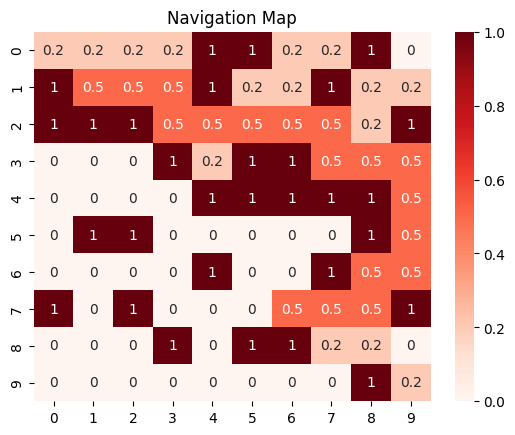

In [10]:
A_Search([1,1],[7,6],x)